In [1]:
import os
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})

In [2]:
folder = 'results/sansLatentNetwork'

embedding_methods = [
    "CLIP_max_DINO_max",
    "CLIP_mean_DINO_mean",
    "CLIP_max_DINO_mean",
    "CLIP_mean_DINO_max",
    "CLIP_mean",
    "CLIP_max",
    "DINO_mean",
    "DINO_max"
]

list_of_users = [
    "Abivishaq",
    "Devleena",
    "Ethan",
    "Khalid",
    "Nadira",
    "Tofunmi2"
]

In [3]:
# Comparing latent vs per-user models.

embb_type_latent = "CLIP_mean_DINO_mean"
embb_type_peruser = "CLIP_mean"

accuracy_models = {
    "latent":
        {
            "memorization_accuracy_hits1": [],
            "memorization_accuracy_hits3": [],
            "subcat_gen_accuracy_hits1": [],
            "subcat_gen_accuracy_hits3": [],
            "cat_gen_accuracy_hits1": [],
            "cat_gen_accuracy_hits3": []
        },
    "per_user":
        {
            "memorization_accuracy_hits1": [],
            "memorization_accuracy_hits3": [],
            "subcat_gen_accuracy_hits1": [],
            "subcat_gen_accuracy_hits3": [],
            "cat_gen_accuracy_hits1": [],
            "cat_gen_accuracy_hits3": []
        }
}

for model in accuracy_models:
    if model == "latent":
        folder = "results/sansLatentNetwork"
        embb_type = embb_type_latent
    elif model == "per_user":
        folder = "results/modelPerUser"
        embb_type = embb_type_peruser

    for u in list_of_users:
        file_path = os.path.join(
            folder,
            f"results_{u}_{embb_type}.json"
        )

        with open(file_path, 'r') as fjson:
            results = json.load(fjson)
            accuracy_models[model]["memorization_accuracy_hits1"].append(results["train_memorization"]["accuracy@hits1"])
            accuracy_models[model]["memorization_accuracy_hits3"].append(results["train_memorization"]["accuracy@hits3"])

            accuracy_models[model]["subcat_gen_accuracy_hits1"].append(results["test_generalization_subcat"]["accuracy@hits1"])
            accuracy_models[model]["subcat_gen_accuracy_hits3"].append(results["test_generalization_subcat"]["accuracy@hits3"])

            accuracy_models[model]["cat_gen_accuracy_hits1"].append(results["test_generalization_cat"]["accuracy@hits1"])
            accuracy_models[model]["cat_gen_accuracy_hits3"].append(results["test_generalization_cat"]["accuracy@hits3"])

linspace = np.arange(len(list_of_users))


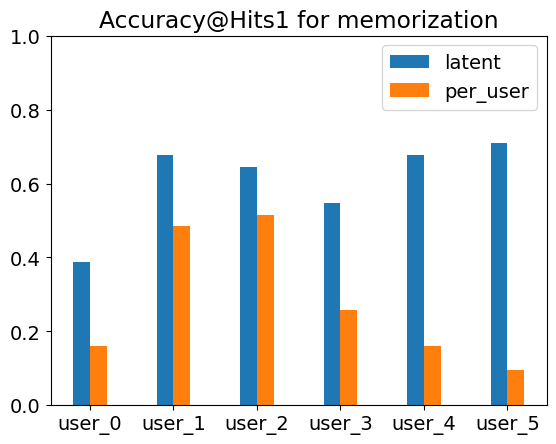

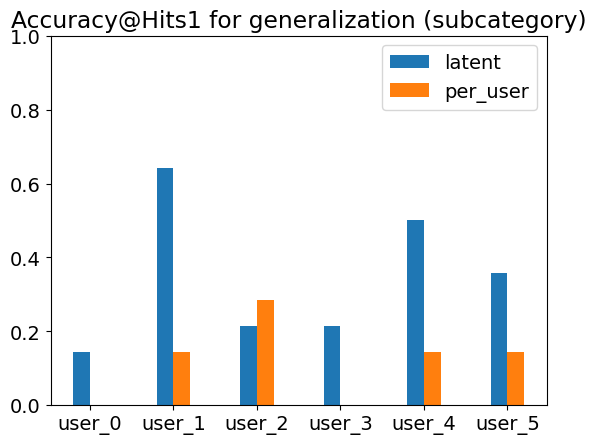

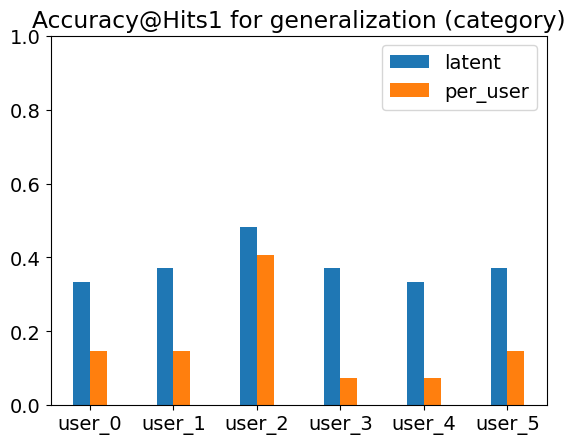

In [4]:
# Memorization.
fig, ax = plt.subplots()
ax.set_title("Accuracy@Hits1 for memorization")
ax.bar(linspace-0.1, accuracy_models["latent"]["memorization_accuracy_hits1"], width=0.2, label="latent")
ax.bar(linspace+0.1, accuracy_models["per_user"]["memorization_accuracy_hits1"], width=0.2, label="per_user")
ax.set_xticks(linspace, [f"user_{i}" for i in range(len(list_of_users))])
ax.set_ylim([0, 1])
ax.legend()

# Generalization (subcategory).
fig, ax = plt.subplots()
ax.set_title("Accuracy@Hits1 for generalization (subcategory)")
ax.bar(linspace-0.1, accuracy_models["latent"]["subcat_gen_accuracy_hits1"], width=0.2, label="latent")
ax.bar(linspace+0.1, accuracy_models["per_user"]["subcat_gen_accuracy_hits1"], width=0.2, label="per_user")
ax.set_xticks(linspace, [f"user_{i}" for i in range(len(list_of_users))])
ax.set_ylim([0, 1])
ax.legend()

# Generalization (category).
fig, ax = plt.subplots()
ax.set_title("Accuracy@Hits1 for generalization (category)")
ax.bar(linspace-0.1, accuracy_models["latent"]["cat_gen_accuracy_hits1"], width=0.2, label="latent")
ax.bar(linspace+0.1, accuracy_models["per_user"]["cat_gen_accuracy_hits1"], width=0.2, label="per_user")
ax.set_xticks(linspace, [f"user_{i}" for i in range(len(list_of_users))])
ax.set_ylim([0, 1])
ax.legend()

(0.0, 1.0)

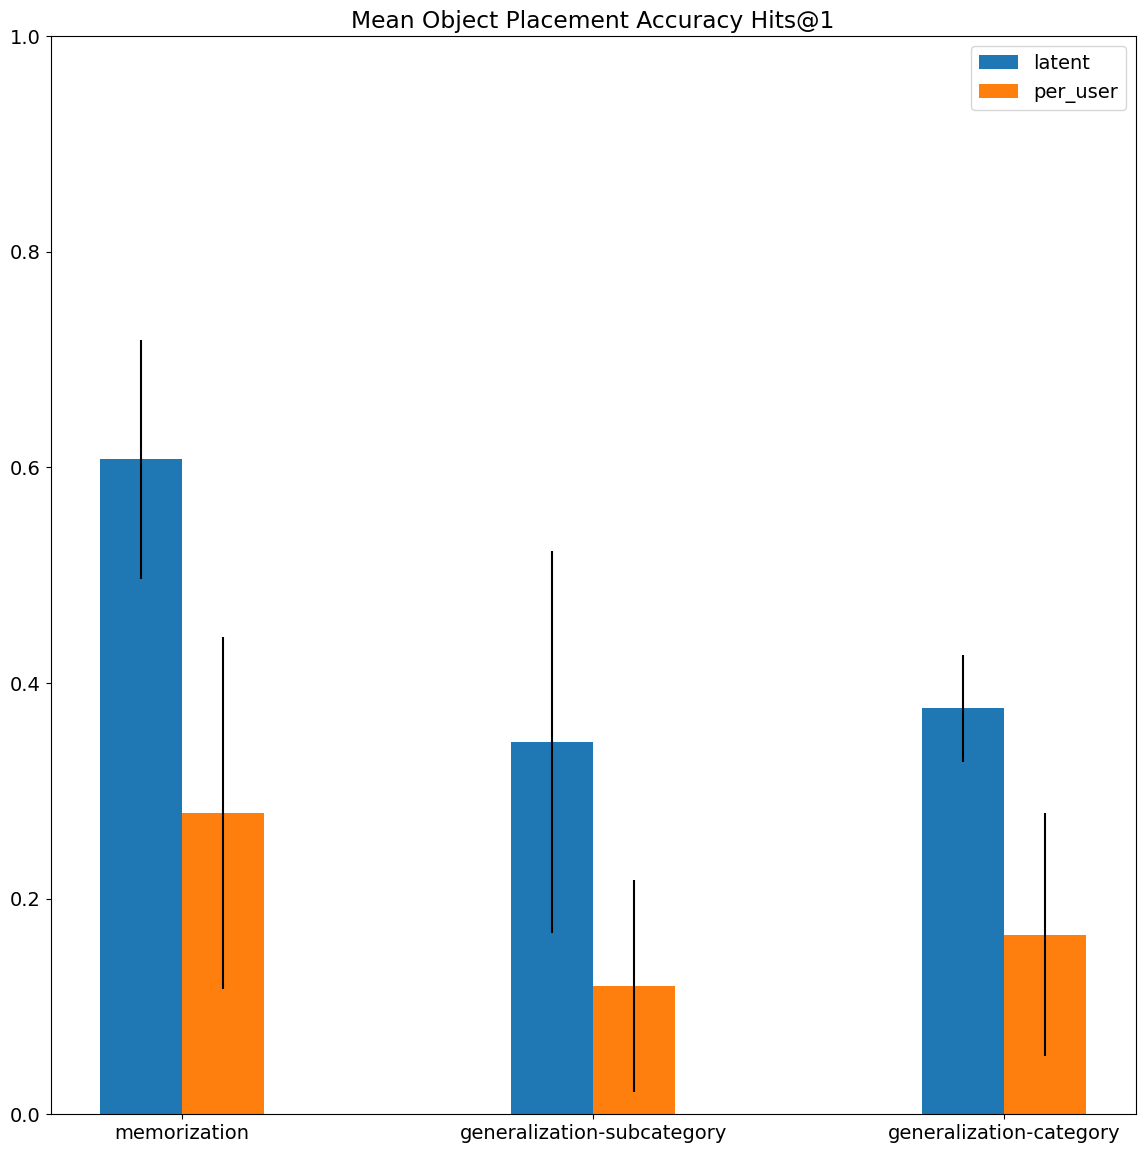

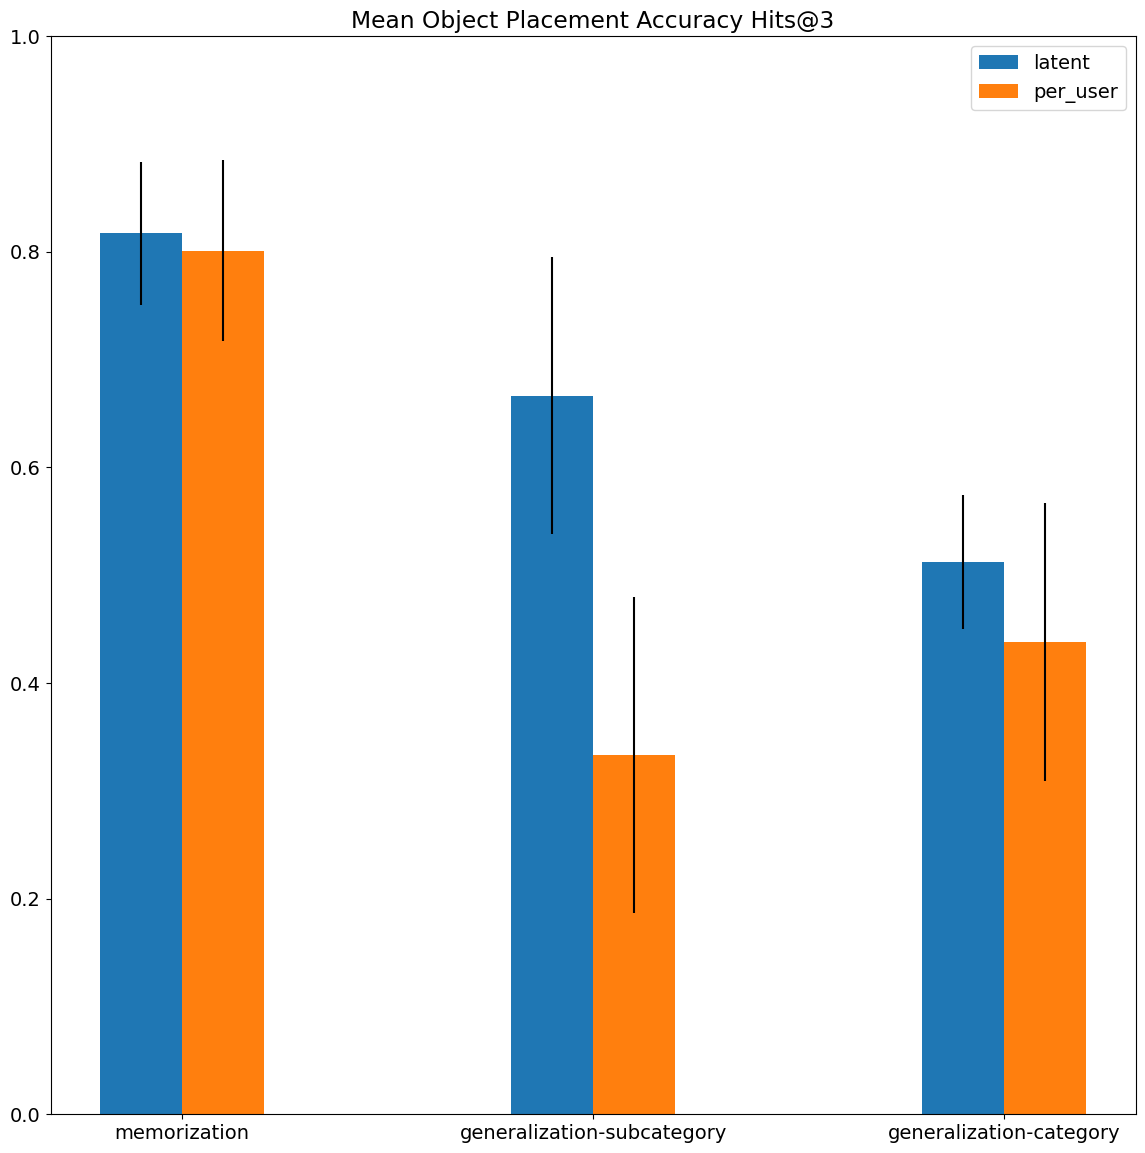

In [5]:
mean_accuracy_latent = {
    "memorization_accuracy_hits1": np.mean(accuracy_models["latent"]["memorization_accuracy_hits1"]),
    "memorization_accuracy_hits3": np.mean(accuracy_models["latent"]["memorization_accuracy_hits3"]),
    "subcat_gen_accuracy_hits1": np.mean(accuracy_models["latent"]["subcat_gen_accuracy_hits1"]),
    "subcat_gen_accuracy_hits3": np.mean(accuracy_models["latent"]["subcat_gen_accuracy_hits3"]),
    "cat_gen_accuracy_hits1": np.mean(accuracy_models["latent"]["cat_gen_accuracy_hits1"]),
    "cat_gen_accuracy_hits3": np.mean(accuracy_models["latent"]["cat_gen_accuracy_hits3"])
}
std_accuracy_latent = {
    "memorization_accuracy_hits1": np.std(accuracy_models["latent"]["memorization_accuracy_hits1"]),
    "memorization_accuracy_hits3": np.std(accuracy_models["latent"]["memorization_accuracy_hits3"]),
    "subcat_gen_accuracy_hits1": np.std(accuracy_models["latent"]["subcat_gen_accuracy_hits1"]),
    "subcat_gen_accuracy_hits3": np.std(accuracy_models["latent"]["subcat_gen_accuracy_hits3"]),
    "cat_gen_accuracy_hits1": np.std(accuracy_models["latent"]["cat_gen_accuracy_hits1"]),
    "cat_gen_accuracy_hits3": np.std(accuracy_models["latent"]["cat_gen_accuracy_hits3"])
}

mean_accuracy_per_user = {
    "memorization_accuracy_hits1": np.mean(accuracy_models["per_user"]["memorization_accuracy_hits1"]),
    "memorization_accuracy_hits3": np.mean(accuracy_models["per_user"]["memorization_accuracy_hits3"]),
    "subcat_gen_accuracy_hits1": np.mean(accuracy_models["per_user"]["subcat_gen_accuracy_hits1"]),
    "subcat_gen_accuracy_hits3": np.mean(accuracy_models["per_user"]["subcat_gen_accuracy_hits3"]),
    "cat_gen_accuracy_hits1": np.mean(accuracy_models["per_user"]["cat_gen_accuracy_hits1"]),
    "cat_gen_accuracy_hits3": np.mean(accuracy_models["per_user"]["cat_gen_accuracy_hits3"])
}
std_accuracy_per_user = {
    "memorization_accuracy_hits1": np.std(accuracy_models["per_user"]["memorization_accuracy_hits1"]),
    "memorization_accuracy_hits3": np.std(accuracy_models["per_user"]["memorization_accuracy_hits3"]),
    "subcat_gen_accuracy_hits1": np.std(accuracy_models["per_user"]["subcat_gen_accuracy_hits1"]),
    "subcat_gen_accuracy_hits3": np.std(accuracy_models["per_user"]["subcat_gen_accuracy_hits3"]),
    "cat_gen_accuracy_hits1": np.std(accuracy_models["per_user"]["cat_gen_accuracy_hits1"]),
    "cat_gen_accuracy_hits3": np.std(accuracy_models["per_user"]["cat_gen_accuracy_hits3"])
}

# Plot mean accuracies for hits@1.
linrange = np.arange(3)
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_title("Mean Object Placement Accuracy Hits@1")
ax.bar(linrange-0.1, [
    mean_accuracy_latent["memorization_accuracy_hits1"],
    mean_accuracy_latent["subcat_gen_accuracy_hits1"],
    mean_accuracy_latent["cat_gen_accuracy_hits1"]
    ], width=0.2, label="latent",
    yerr=[
        std_accuracy_latent["memorization_accuracy_hits1"],
        std_accuracy_latent["subcat_gen_accuracy_hits1"],
        std_accuracy_latent["cat_gen_accuracy_hits1"]
    ])
ax.bar(linrange+0.1, [
    mean_accuracy_per_user["memorization_accuracy_hits1"],
    mean_accuracy_per_user["subcat_gen_accuracy_hits1"],
    mean_accuracy_per_user["cat_gen_accuracy_hits1"]
    ], width=0.2, label="per_user",
    yerr=[
        std_accuracy_per_user["memorization_accuracy_hits1"],
        std_accuracy_per_user["subcat_gen_accuracy_hits1"],
        std_accuracy_per_user["cat_gen_accuracy_hits1"]
    ])
ax.set_xticks(
    linrange,
    ["memorization", "generalization-subcategory", "generalization-category"],
    # rotation=45
)
ax.legend()
ax.set_ylim([0, 1])

# Plot mean accuracies for hits@3.
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_title("Mean Object Placement Accuracy Hits@3")
ax.bar(linrange-0.1, [
    mean_accuracy_latent["memorization_accuracy_hits3"],
    mean_accuracy_latent["subcat_gen_accuracy_hits3"],
    mean_accuracy_latent["cat_gen_accuracy_hits3"]
    ], width=0.2, label="latent",
    yerr=[
        std_accuracy_latent["memorization_accuracy_hits3"],
        std_accuracy_latent["subcat_gen_accuracy_hits3"],
        std_accuracy_latent["cat_gen_accuracy_hits3"]
    ])

ax.bar(linrange+0.1, [
    mean_accuracy_per_user["memorization_accuracy_hits3"],
    mean_accuracy_per_user["subcat_gen_accuracy_hits3"],
    mean_accuracy_per_user["cat_gen_accuracy_hits3"]
    ], width=0.2, label="per_user",
    yerr=[
        std_accuracy_per_user["memorization_accuracy_hits3"],
        std_accuracy_per_user["subcat_gen_accuracy_hits3"],
        std_accuracy_per_user["cat_gen_accuracy_hits3"]
    ])
ax.set_xticks(
    linrange,
    ["memorization", "generalization-subcategory", "generalization-category"],
    # rotation=45
)
ax.legend()
ax.set_ylim([0, 1])


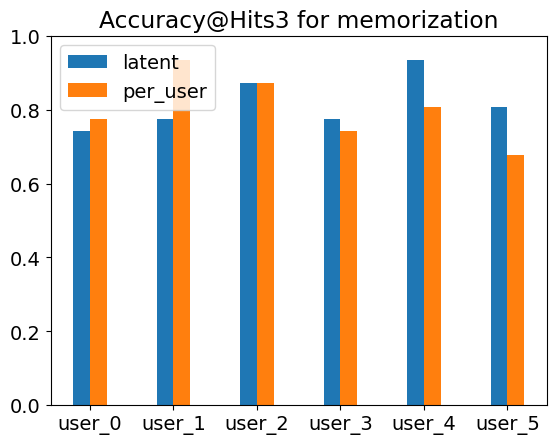

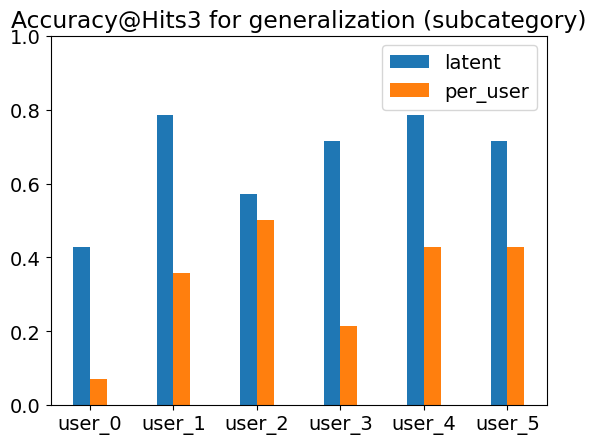

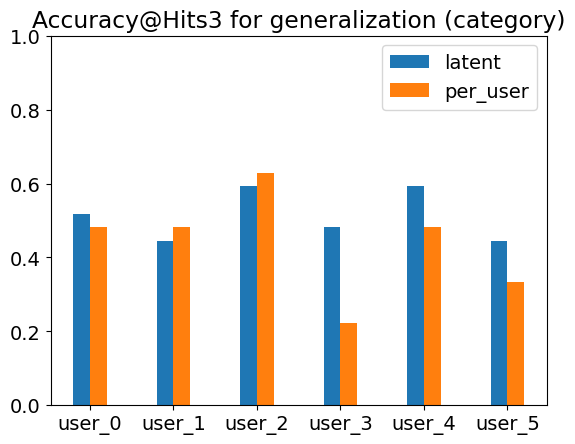

In [6]:
# Memorization.
fig, ax = plt.subplots()
ax.set_title("Accuracy@Hits3 for memorization")
ax.bar(linspace-0.1, accuracy_models["latent"]["memorization_accuracy_hits3"], width=0.2, label="latent")
ax.bar(linspace+0.1, accuracy_models["per_user"]["memorization_accuracy_hits3"], width=0.2, label="per_user")
ax.set_xticks(linspace, [f"user_{i}" for i in range(len(list_of_users))])
ax.set_ylim([0, 1])
ax.legend()

# Generalization (subcategory).
fig, ax = plt.subplots()
ax.set_title("Accuracy@Hits3 for generalization (subcategory)")
ax.bar(linspace-0.1, accuracy_models["latent"]["subcat_gen_accuracy_hits3"], width=0.2, label="latent")
ax.bar(linspace+0.1, accuracy_models["per_user"]["subcat_gen_accuracy_hits3"], width=0.2, label="per_user")
ax.set_xticks(linspace, [f"user_{i}" for i in range(len(list_of_users))])
ax.set_ylim([0, 1])
ax.legend()

# Generalization (category).
fig, ax = plt.subplots()
ax.set_title("Accuracy@Hits3 for generalization (category)")
ax.bar(linspace-0.1, accuracy_models["latent"]["cat_gen_accuracy_hits3"], width=0.2, label="latent")
ax.bar(linspace+0.1, accuracy_models["per_user"]["cat_gen_accuracy_hits3"], width=0.2, label="per_user")
ax.set_xticks(linspace, [f"user_{i}" for i in range(len(list_of_users))])
ax.set_ylim([0, 1])
ax.legend()

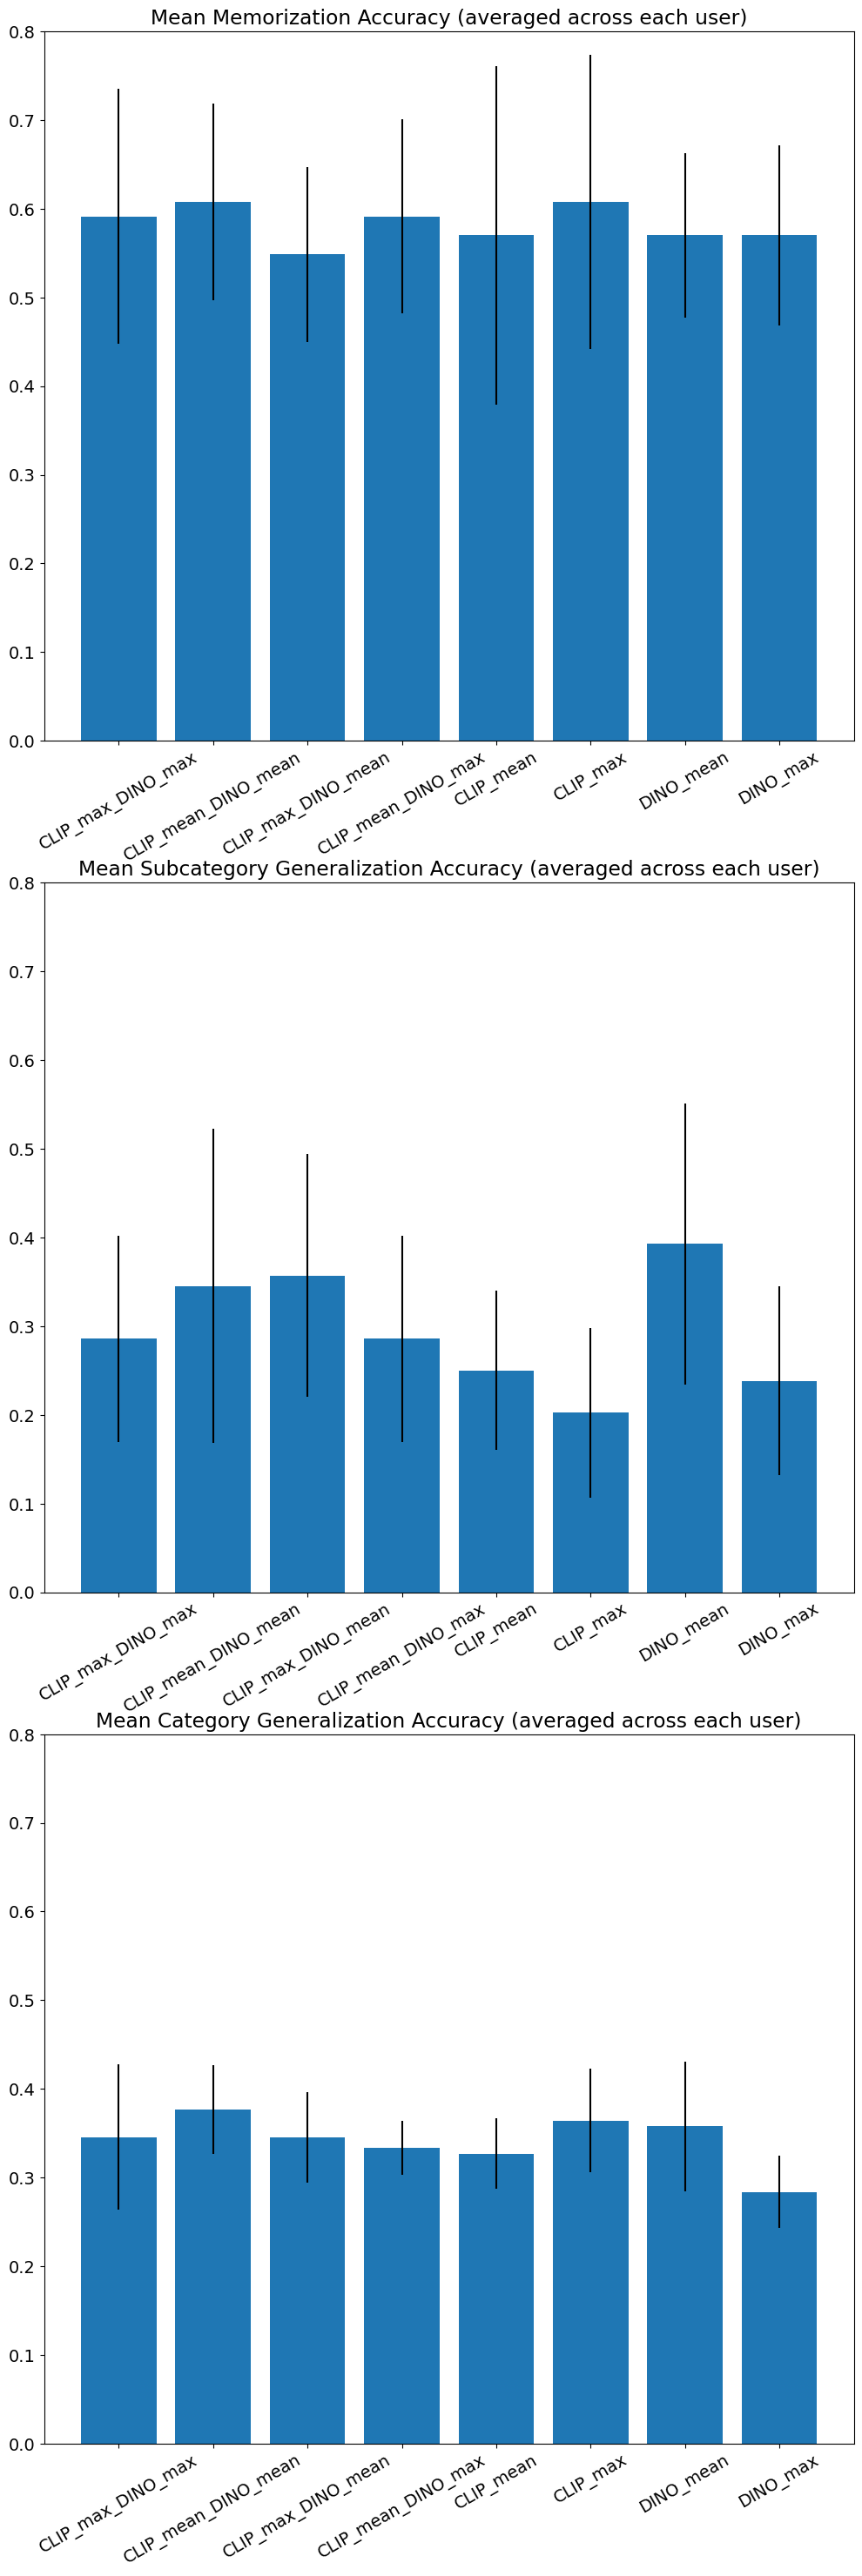

In [7]:
# Ablating object representations.

average_memorization_acc_array = []
std_memorization_acc_array = []
average_subcat_gen_acc_array = []
std_subcat_gen_acc_array = []
average_cat_gen_acc_array = []
std_cat_gen_acc_array = []

for embb_type in embedding_methods:
    memorization_acc_array = []
    subcat_gen_acc_array = []
    cat_gen_acc_array = []
    for user in list_of_users:
        file_path = os.path.join(
            "results/sansLatentNetwork",
            f"results_{user}_{embb_type}.json"
        )
        # print(file_path)
        with open(file_path, 'r') as fjson:
            results = json.load(fjson)
            memorization_acc_array.append(
                results["train_memorization"]["accuracy@hits1"]
            )
            subcat_gen_acc_array.append(
                results["test_generalization_subcat"]["accuracy@hits1"]
            )
            cat_gen_acc_array.append(
                results["test_generalization_cat"]["accuracy@hits1"]
            )
    average_memorization_acc_array.append(np.mean(memorization_acc_array))
    std_memorization_acc_array.append(np.std(memorization_acc_array))

    average_subcat_gen_acc_array.append(np.mean(subcat_gen_acc_array))
    std_subcat_gen_acc_array.append(np.std(subcat_gen_acc_array))

    average_cat_gen_acc_array.append(np.mean(cat_gen_acc_array))
    std_cat_gen_acc_array.append(np.std(cat_gen_acc_array))

fig, ax = plt.subplots(3, 1, figsize=(12, 36))
ax[0].bar(np.arange(len(embedding_methods)), average_memorization_acc_array, yerr=std_memorization_acc_array)
ax[0].set_ylim([0, 0.8])
ax[0].set_title("Mean Memorization Accuracy (averaged across each user)")
ax[1].bar(np.arange(len(embedding_methods)), average_subcat_gen_acc_array, yerr=std_subcat_gen_acc_array)
ax[1].set_ylim([0, 0.8])
ax[1].set_title("Mean Subcategory Generalization Accuracy (averaged across each user)")
ax[2].bar(np.arange(len(embedding_methods)), average_cat_gen_acc_array, yerr=std_cat_gen_acc_array)
ax[2].set_ylim([0, 0.8])
ax[2].set_title("Mean Category Generalization Accuracy (averaged across each user)")
for a in ax: a.set_xticks(np.arange(len(embedding_methods)), embedding_methods, rotation=30)
plt.show()